In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get data

!wget '/content/archive(3).zip'
!unzip '/content/archive(3).zip'


Streaming output truncated to the last 5000 lines.
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0266.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0267.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0268.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0269.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0270.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0271.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0272.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0273.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0274.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0275.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0276.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0277.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0278.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0279.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0280.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0281.jpg  
  inf

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:
#count no. of images in the respective classes
# 0 = Brain Tumor
# 1 = Healthy Brain

root_dir = '/content/Brain_Tumor_Dataset'
number_of_images = {}

for dir in os.listdir(root_dir):
  number_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

number_of_images.items()

dict_items([('Negative', 2000), ('Positive', 3266)])

In [5]:
os.listdir(root_dir)

['Negative', 'Positive']

In [6]:
#Split the data
#70% train data
#15% Validation
#15% Testing

In [7]:
#create train folder

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(root_dir):
    os.makedirs(os.path.join("./train", dir))

    for img in np.random.choice(a = os.listdir(os.path.join(root_dir, dir)),
                                size = (math.floor(70/100*number_of_images[dir])-5),
                                replace = False):
      O = os.path.join(root_dir, dir, img)#path
      D = os.path.join("./train", dir)
      shutil.copy(O, D)
      os.remove(O)
else:
  print("The folder exists!")

In [8]:
def dataFolder(path,split):
  #create train folder

  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(root_dir):
      os.makedirs(os.path.join("./"+path+"/"+dir))

      for img in np.random.choice(a = os.listdir(os.path.join(root_dir, dir)),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(root_dir, dir, img)#path
        D = os.path.join("./"+path, dir)
        shutil.copy(O, D)
        os.remove(O)
  else:
    print(f"{path} The folder exists!")

In [9]:
dataFolder("train",0.7)

train The folder exists!


In [12]:
dataFolder("test",0.15)

test The folder exists!


In [13]:
dataFolder("val",0.15)

val The folder exists!


MODEL BUILD

In [17]:
#import libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential, Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:

#CNN Model

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=(3,3),activation = 'relu', input_shape = (224,224,3)))
model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
  model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

In [20]:
def preprocessingImages1(path):
  '''
  input: path
  output: preprocessed images
  '''

  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function=preprocess_input, horizontal_flip=True)  #data augmentation
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
  return image


In [21]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 3676 images belonging to 2 classes.


In [22]:
 def preprocessingImages2(path):
  '''
  input: path
  output: preprocessed images
  '''

  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
  return image


In [23]:
test_data = preprocessingImages2("/content/test")

Found 779 images belonging to 2 classes.


In [24]:
val_data = preprocessingImages2("/content/val")

Found 779 images belonging to 2 classes.


In [25]:
train_data.class_indices

{'Negative': 0, 'Positive': 1}

In [26]:
#Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5, verbose = 1 , mode = 'auto')

#model check point

mc = ModelCheckpoint(filepath = "./best_model.keras", monitor = 'val_accuracy', verbose = 1, save_best_only = True , mode = 'auto')

cb = [es,mc]

In [27]:
# Load MobileNet base model and fine-tune some layers
base_model = MobileNet(input_shape=(224,224,3), include_top=False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [28]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [29]:
for layer in base_model.layers:
  layer.trainable = False

In [30]:
x = Flatten()(base_model.output)
x = Dense(units = 1, activation = 'sigmoid')(x)

#creating model
model = Model(base_model.input, x)

model.summary()

#compiling model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [31]:
# callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath = "./best_model.keras", monitor = "val_accuracy", verbose =1, save_best_only = True, mode = "auto")
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 3, verbose = 1, mode = "auto")
cb = [mc,es]

In [32]:
hist = model.fit(train_data,
                 steps_per_epoch=8,
                 epochs=30,
                 validation_data=val_data,
                 validation_steps=16,
                 callbacks=cb)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7252 - loss: 0.7548
Epoch 1: val_accuracy improved from -inf to 0.94922, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.7366 - loss: 0.7497 - val_accuracy: 0.9492 - val_loss: 0.2905
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8717 - loss: 0.7565
Epoch 2: val_accuracy improved from 0.94922 to 0.95131, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.8764 - loss: 0.7317 - val_accuracy: 0.9513 - val_loss: 0.4966
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9332 - loss: 0.3992
Epoch 3: val_accuracy improved from 0.95131 to 0.95508, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.9329 - loss: 0.3977 - val_accuracy: 0.9551 - val_loss: 0.3285
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9729 - loss: 0.1724
Epoch 4: val_accuracy improved from 0.95508 to 0.95880, saving mode

In [33]:
#load the best fit model
model = load_model("/content/best_model.keras")


In [34]:
acc = model.evaluate(test_data)[1]
print(f"Our model accuracy is {acc*100} %")

25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9740 - loss: 0.2194
Our model accuracy is 97.04749584197998 %


In [35]:
# Model Graphical Interpretation
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

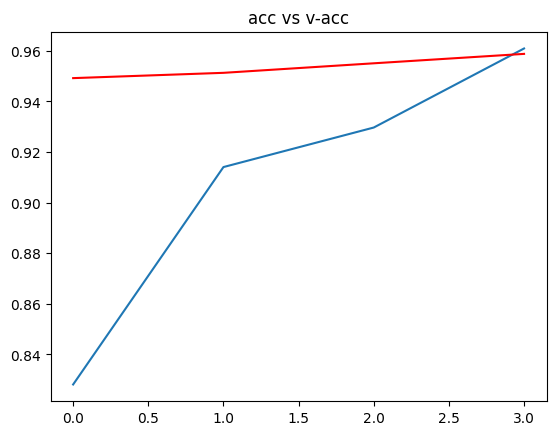

In [36]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

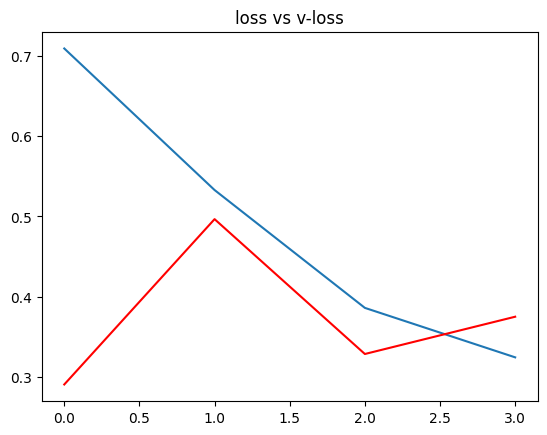

In [37]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()



In [38]:
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The person has Brain Tumor


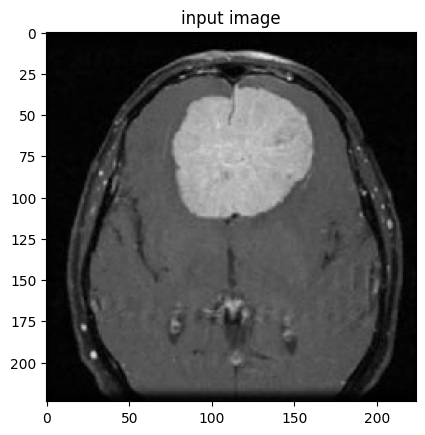

In [43]:
path = "/content/Brain_Tumor_Dataset/Positive/Te-me_0068.jpg"

img = image.load_img(path, target_size=(224,224))


i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

#pred = model.predict_classes(input_arr)[0][0]
pred = np.argmax(model.predict(input_arr))
#print(pred)

if pred == 0:
  print("The person has Brain Tumor")
else:
  print("The person is healthy")


#Display output
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()
